In this chapter, we have learned how to visualize data by drawing graphs. A common use of such visualizations is to compare two datasets. In this section, we will see how to overlay plots, that is, draw them in a single graphic on a common pair of axes.

## Scatter Plot
Galton meticulously collected copious amounts of data, some of which we will analyze in this course. Here is a subset of Galton's data on heights of parents and their children. Specifically, the population consists of 179 men who were the first-born in their families. The data are their own heights and the heights of their parents. All heights were measured in inches.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick 

In [2]:
heights = pd.read_csv( 'galton_subset.csv')
heights.head(10)

,father,mother,son
0,78.5,67.0,73.2
1,75.5,66.5,73.5
2,75.0,64.0,71.0
3,75.0,64.0,70.5
4,75.0,58.5,72.0
5,74.0,68.0,76.5
6,74.0,62.0,74.0
7,73.0,67.0,71.0
8,73.0,67.0,68.0
9,73.0,66.5,71.0


In [3]:
f=heights['father']
m=heights['mother']
s=heights['son']

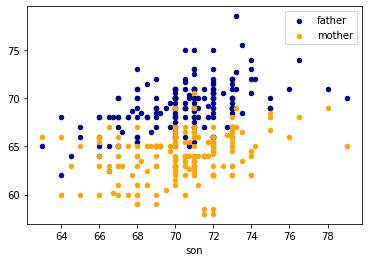

In [4]:
ax = heights.plot.scatter('son','father', c='DarkBlue',label='father')
heights.plot.scatter('son','mother', c='orange', label='mother', ax=ax)
ax.set_xlabel("son")
ax.set_ylabel("")
plt.show()

## Line Plots 

Our next example involves data on children of more recent times. We will return to the Census data table us_pop, created below again for reference. From this, we will extract the counts of all children in each of the age categories 0 through 18 years.

In [5]:
# Read the full Census table
full_census_table = pd.read_csv( 'http://www2.census.gov/programs-surveys/popest/datasets/2010-2015/national/asrh/nc-est2015-agesex-res.csv')
full_census_table

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
1,0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
2,0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
3,0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
4,0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035
...,...,...,...,...,...,...,...,...,...,...
301,2,97,53582,53605,54118,57159,59533,61255,62779,69285
302,2,98,36641,36675,37532,40116,42857,44359,46208,47272
303,2,99,26193,26214,26074,27030,29320,31112,32517,34064
304,2,100,44202,44246,45058,47556,50661,53902,58008,61886


In [6]:
# Select columns from the full table and relabel some of them
partial_census_table = full_census_table[['SEX','AGE', 'POPESTIMATE2010','POPESTIMATE2014']]
partial_census_table 

,SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,0,3951330,3949775
1,0,1,3957888,3949776
2,0,2,4090862,3959664
3,0,3,4111920,4007079
4,0,4,4077551,4005716
...,...,...,...,...
301,2,97,54118,62779
302,2,98,37532,46208
303,2,99,26074,32517
304,2,100,45058,58008


In [7]:
us_pop=partial_census_table .rename(columns={"POPESTIMATE2010": "2010","POPESTIMATE2014":"2014"})

In [8]:
children=us_pop[(us_pop.AGE<= 18) & (us_pop.SEX ==0)]
children

,SEX,AGE,2010,2014
0,0,0,3951330,3949775
1,0,1,3957888,3949776
2,0,2,4090862,3959664
3,0,3,4111920,4007079
4,0,4,4077551,4005716
5,0,5,4064653,4006900
6,0,6,4073013,4135930
7,0,7,4043046,4155326
8,0,8,4025604,4120903
9,0,9,4125415,4108349


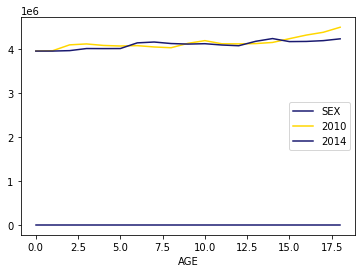

In [9]:
children.plot.line('AGE', color=['midnightblue', 'gold'])
plt.show()

We can now draw two overlaid line plots, showing the numbers of children in the different age groups for each of the years 2010 and 2014. The method call is analogous to the scatter call in the previous example.

On this scale, it's important to remember that we only have data at ages 0, 1, 2, and so on; the graphs "join the dots" in between.

The graphs cross each other in a few places: for example, there were more 4-year-olds in 2010 than in 2014, and there were more 14-year-olds in 2014 than in 2010.

## Bar Charts
For our final example of this section, we look at distributions of ethnicities of adults and children in California as well as in the entire United States.

The Kaiser Family Foundation has complied Census data on the distribution of race and ethnicity in the U.S. The Foundation's website provides compilations of data for the entire U.S. population in 2014, as well as for U.S. children who were younger than 18 years old that year.

Here is a table adapted from their data for the United States and California. The columns represent everyone in the U.S.A., everyone in California, children in the U.S.A., and children in California. The body of the table contains proportions in the different categories. Each column shows the distribution of ethnicities in the group of people corresponding to that column. So in each column, the entries add up to 1.

In [10]:
usa_ca=pd.read_csv( 'usa_ca_2014.csv')
usa_ca

,Ethnicity,USA All,CA All,USA Children,CA Children
0,Black,0.12,0.05,0.14,0.05
1,Hispanic,0.18,0.38,0.24,0.50
2,White,0.62,0.39,0.52,0.29
3,Other,0.08,0.18,0.10,0.16


It is natural to want to compare these distributions. It makes sense to compare the columns directly, because all the entries are proportions and are therefore on the same scale.

The method barh allows us to visualize the comparisons by drawing multiple bar charts on the same axes. The call is analogous to those for scatter and plot: we have to specify the common axis of categories.

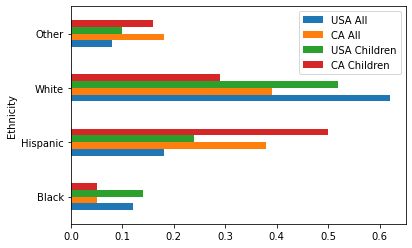

In [11]:
usa_ca.plot.barh(x='Ethnicity')

Let's start by comparing the entire populations of the U.S.A. and California.

In [12]:
usa_new=usa_ca[['Ethnicity','USA All','CA All']]
usa_new

,Ethnicity,USA All,CA All
0,Black,0.12,0.05
1,Hispanic,0.18,0.38
2,White,0.62,0.39
3,Other,0.08,0.18


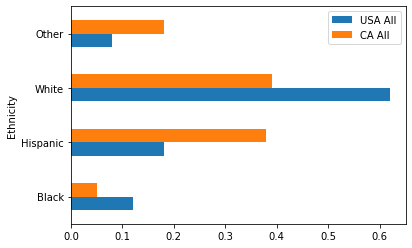

In [13]:
usa_new.plot.barh(x='Ethnicity')

As you can see from the graph, almost 40% of the Californian population in 2014 was Hispanic. A comparison with the population of children in the state indicates that the Hispanic proportion is likely to be greater in future years. Among Californian children, 50% are in the Hispanic category.

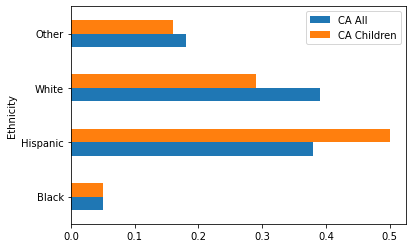

In [14]:
usa_new=usa_ca[['Ethnicity','CA All','CA Children']]
usa_new.plot.barh(x='Ethnicity')

More complex datasets naturally give rise to varied and interesting visualizations, including overlaid graphs of different kinds. To analyze such data, it helps to have some more skills in data manipulation, so that we can get the data into a form that allows us to use methods like those in this section. In the next chapter we will develop some of these skills.